In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import svm

# Exercise 1 : Linear SVM - Influence of parameter C

In [79]:
dataset = pd.read_csv('LineaireNoisy2.csv', delimiter=';')
dataset

,x1,x2,y
0,10.00,5.00,1
1,9.50,10.00,-1
2,2.30,5.25,-1
3,3.40,3.88,-1
4,7.66,4.46,-1
...,...,...,...
147,15.01,15.67,1
148,16.05,14.70,1
149,15.65,18.23,1
150,18.85,17.43,1


In [80]:
dataset['y'].value_counts(normalize=False)

 1    76
-1    76
Name: y, dtype: int64

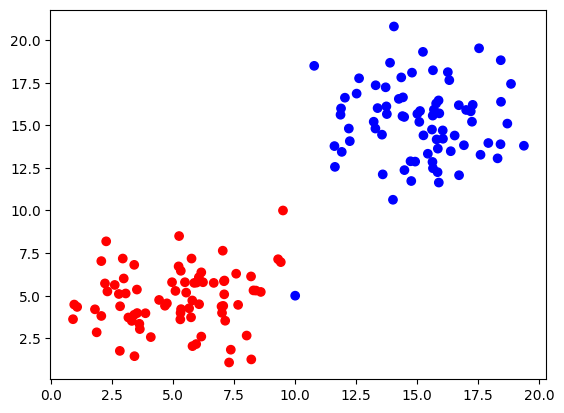

In [81]:
fig, ax = plt.subplots()       
colors = {-1:"red", 1:"blue"}
ax.scatter(dataset['x1'], dataset['x2'], c=dataset['y'].map(colors))
plt.show()

## Fitting a linear SVM to this dataset

In [82]:
model_svm = svm.SVC(C = 1000, kernel = 'linear')
# here SVC stands for Support Vector Classification (there are other kinds of SVM),and we ask for a linear kernel
# The parameter C is set to 1000

In [83]:
model_svm.fit(dataset.iloc[:,0:2], dataset.y)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

SVC(C=1000, kernel='linear')

In [84]:
model_svm.support_vectors_
# the support vectors found by the SVC. Here 3 support vectors, called sv1, sv2 and sv3

array([[ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [85]:
model_svm.support_
# the index of the support vectors in the dataset. you can check 

array([ 61,   0, 102], dtype=int32)

In [86]:
model_svm.dual_coef_
# the lagrange coefficients associated to the support vectors (w1, w2 and w3)

array([[-4.04838982,  3.46935572,  0.5790341 ]])

In [87]:
model_svm.intercept_
# the constant of the model (w0)

array([-26.58177221])

In [88]:
model_svm.decision_function(dataset.iloc[:,0:2])

array([  0.99940407,  -1.24148389, -20.91114918, -17.56203656,
        -5.55801067, -10.10889154,  -3.90822106, -21.76685665,
       -10.39666304, -18.76130279, -13.09448448, -15.41565599,
       -22.18728362,  -3.62255982, -16.27032034, -17.78695937,
        -7.43350422, -17.49256868, -17.13473082,  -7.38326661,
       -19.5516331 , -12.85908729, -16.87859157, -18.21741848,
        -4.32685023, -10.06558557,  -6.0540296 , -12.56078853,
       -12.99192542, -11.72582313,  -7.3553862 , -12.18372041,
        -7.47457014, -24.64741494, -10.16024918, -18.04301931,
       -14.80785344, -21.27232307,  -1.34003152, -17.23762877,
        -7.28068112, -13.86615894, -19.43865014, -10.60139177,
        -7.27870065, -10.47191611,  -5.97833429, -10.88212828,
        -3.49899913, -12.14974236,  -4.26845759, -20.12147022,
       -11.9679693 , -11.42929574, -14.07039256, -24.64824895,
        -6.91064799, -19.1329775 , -16.77089868,  -8.609971  ,
        -9.54137378,  -0.99970304, -10.91975481,  -7.86

In [89]:
for elt in model_svm.support_:
    print(model_svm.decision_function(dataset.iloc[[elt],0:2]))


[-0.99970304]
[0.99940407]
[1.00026691]


In [90]:
model_svm.predict(dataset.iloc[:,0:2])
model_svm.score(dataset.iloc[:,0:2], dataset.y)
#dataset

1.0

In [91]:
def svm_draw(model_svm, xmin, xmax, dataset):
    
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))


    plt.figure(figsize=(10, 8))
    # Plotting our two-features-space
    plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.y, cmap = color_map, marker='+')
    # Constructing a hyperplane using a formula.
    w = model_svm.coef_[0]           # w consists of 2 elements
    b = model_svm.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(xmin, xmax)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

    plt.plot(x_points, y_points, c='g');

    plt.scatter(model_svm.support_vectors_[:, 0],
                model_svm.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=1);

    # Step 2 (unit-vector):
    w_hat = model_svm.coef_[0] / (np.sqrt(np.sum(model_svm.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model_svm.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
             points_of_line_above[:, 1], 
             'g--', 
             linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
             points_of_line_below[:, 1], 
             'g--',
             linewidth=2)

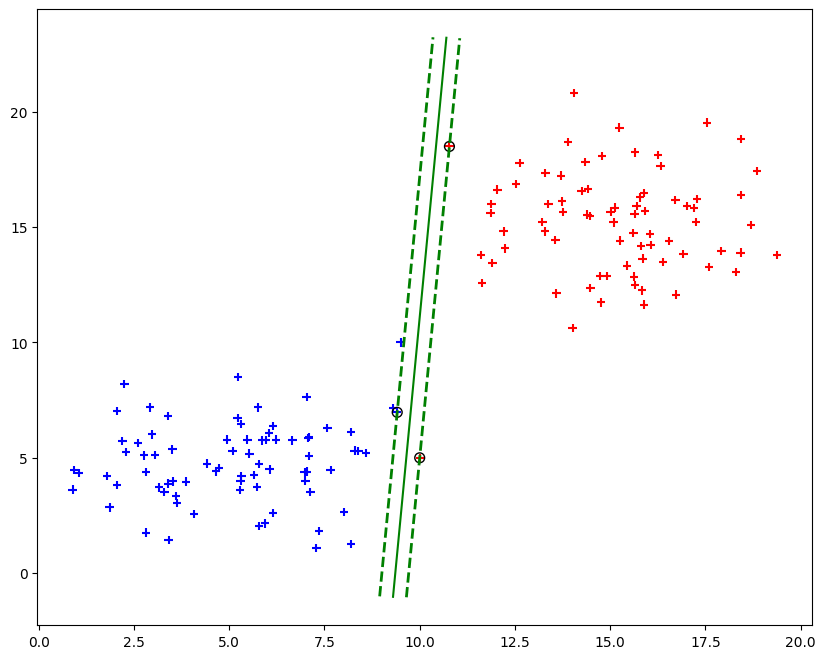

In [92]:
svm_draw(model_svm, 9.3, 10.7, dataset)

In [93]:
model_svm = svm.SVC(C = 1, kernel = 'linear')
# here SVC stands for Support Vector Classification (there are other kinds of SVM),and we ask for a linear kernel
# The parameter C is set to 1

In [94]:
model_svm.fit(dataset.iloc[:,0:2], dataset.y)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

SVC(C=1, kernel='linear')

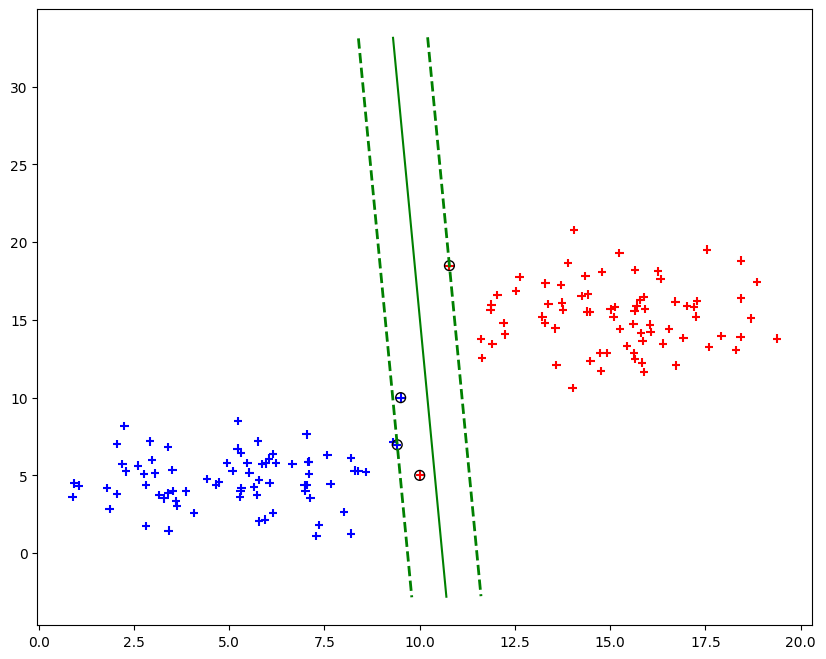

In [95]:
svm_draw(model_svm, 9.3, 10.7, dataset)

In [96]:
print("Le nombre de points dans la marge est 4 avec un point mal placé")

Le nombre de points dans la marge est 4 avec un point mal placé


In [97]:
model_svm.decision_function(dataset.iloc[:,0:2])

array([ -0.43553644,  -0.77124977,  -8.89260688,  -7.74159938,
        -3.03198842,  -4.78981348,  -2.30276606,  -9.47926821,
        -4.73314161,  -8.07296277,  -5.52026292,  -7.04990094,
        -9.49842957,  -2.1932232 ,  -7.23187758,  -7.86698876,
        -3.61028944,  -7.55724499,  -7.83467545,  -3.58658208,
        -8.38216681,  -5.61849182,  -7.53335908,  -8.01238266,
        -2.37761785,  -5.02199746,  -3.58364186,  -5.5306532 ,
        -5.8231273 ,  -5.34353714,  -3.77792731,  -5.64743664,
        -3.78364671, -10.42119227,  -4.61075021,  -7.61611196,
        -6.58263301,  -8.98244864,  -1.11368147,  -7.60535116,
        -3.70538206,  -6.23929106,  -8.11712977,  -4.84539246,
        -3.63227025,  -5.19209358,  -3.47454071,  -4.95622016,
        -2.57519538,  -5.67470857,  -2.72418069,  -8.54641865,
        -5.37239734,  -5.0159437 ,  -6.33326396, -10.51301032,
        -3.65466592,  -8.12325062,  -7.52464168,  -4.07645106,
        -4.77221355,  -0.99999406,  -5.18569615,  -3.58

In [98]:
model_svm = svm.SVC(C = 0.01, kernel = 'linear')
# here SVC stands for Support Vector Classification (there are other kinds of SVM),and we ask for a linear kernel
# The parameter C is set to 1

In [99]:
model_svm.fit(dataset.iloc[:,0:2], dataset.y)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

SVC(C=0.01, kernel='linear')

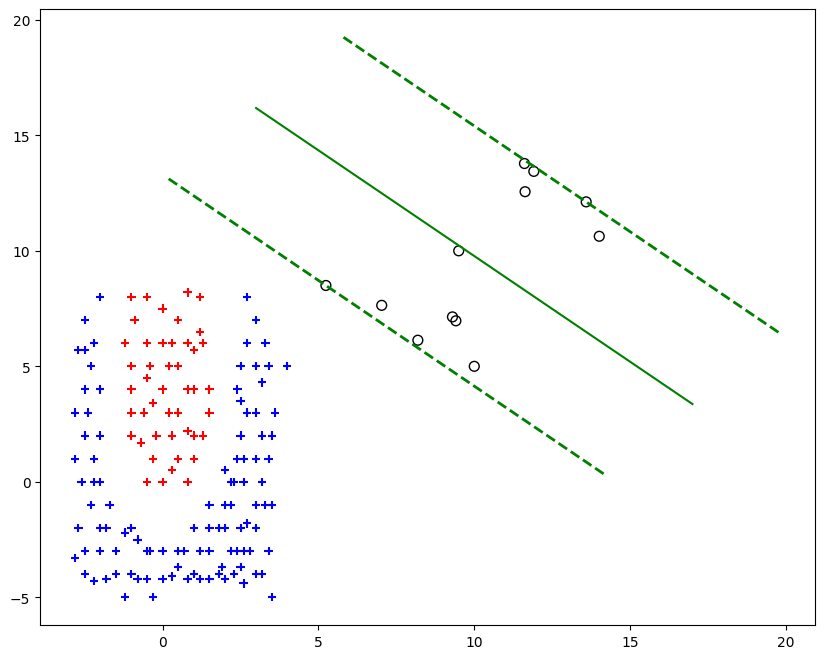

In [109]:
svm_draw(model_svm, 3, 17, dataset)

In [108]:
model_svm.decision_function(dataset.iloc[:,0:2])

array([-2.40696194, -2.84337285, -3.36105283, -2.48823102, -2.74707101,
       -2.65076918, -3.16844916, -3.4423219 , -2.99087824, -2.58453286,
       -2.08432775, -2.37689643, -2.10302368, -2.63573642, -2.03678736,
       -2.2468659 , -2.02927098, -3.03841863, -2.01179611, -2.81330733,
       -2.6432528 , -2.53821352, -2.92586298, -2.95714955, -2.39192919,
       -3.17295898, -3.22350592, -3.10221284, -2.16559683, -2.18636047,
       -2.26434078, -1.77494082, -2.29562735, -2.52073865, -3.23224336,
       -2.79583246, -2.44069063, -3.02094376, -2.7946114 , -2.80607317,
       -3.2310223 , -2.49067314, -2.0217546 , -1.74543974, -2.84036629,
       -3.89376557, -3.97503464, -1.82304564, -2.34072562, -2.06685287,
       -2.97584549, -4.1375728 , -3.90879832, -3.21354743, -3.41225639,
       -4.23387463, -2.52440183, -3.81249649, -3.8149386 , -2.26556183,
       -3.64995833, -3.30984926, -1.63044197, -3.68612914, -2.59956561,
       -2.65321129, -3.05711456, -3.78365203, -4.04127096, -4.47

# Exercise 2: Choosing C using train/val/test split

In [110]:
# Load the dataset
dataset = pd.read_csv("spam7.csv", decimal=",", index_col=0, delimiter = ";")
dataset
# A description about this dataset is given here:
# http://math.furman.edu/~dcs/courses/math47/R/library/DAAG/html/spam7.html

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [112]:
from sklearn.preprocessing import StandardScaler
# First, get the features
X = dataset.iloc[:,0:6]
# then create a scaler on X
scaler = StandardScaler().fit(X)
# Apply it to X
X = scaler.transform(X)
# create a dataframe with X
X = pd.DataFrame(X, columns=dataset.columns[0:6])
X
# You should see that the features have been transformed
print(X.dollar.mean())
# the mean of feature 'dollar' is now 0 (very close to 0)
# it is the same for the other features

-2.470915838331146e-17


In [113]:
# Now we will add the target variable inside X
X['yesno'] = dataset.yesno
X
# now our dataset is called X

,crl.tot,dollar,bang,money,n000,make,yesno
0,-0.008724,-0.308355,0.624007,-0.212994,-0.290209,-0.342434,y
1,1.228324,0.423783,0.126203,0.758565,0.937491,0.345359,y
2,3.258733,0.440053,0.008496,-0.077428,3.021726,-0.145921,y
3,-0.152222,-0.308355,-0.161934,-0.212994,-0.290209,-0.342434,y
4,-0.152222,-0.308355,-0.164387,-0.212994,-0.290209,-0.342434,y
...,...,...,...,...,...,...,...
4596,-0.322110,-0.308355,-0.329912,-0.212994,-0.290209,0.672880,n
4597,-0.444165,-0.308355,0.102907,-0.212994,-0.290209,-0.342434,n
4598,-0.272628,-0.308355,-0.329912,-0.212994,-0.290209,0.640128,n
4599,-0.338604,-0.308355,-0.329912,-0.212994,-0.290209,2.801763,n


In [118]:
train, test = train_test_split(X, test_size = 0.3, random_state = 4)
valid, test = train_test_split(X, test_size = 0.5, random_state = 4)

In [119]:
train

,crl.tot,dollar,bang,money,n000,make,yesno
818,-0.013672,-0.308355,-0.133734,1.300831,-0.290209,-0.342434,y
2789,-0.302317,-0.308355,-0.329912,-0.212994,-0.290209,-0.342434,n
3455,-0.327058,-0.308355,-0.329912,-0.212994,-0.290209,2.113970,n
702,-0.294070,-0.308355,-0.172969,-0.212994,-0.290209,-0.342434,y
154,-0.132429,-0.308355,0.263528,-0.212994,-0.290209,-0.342434,y
...,...,...,...,...,...,...,...
3671,-0.459010,-0.308355,-0.329912,-0.212994,-0.290209,-0.342434,n
709,0.355793,0.004837,0.708609,0.894132,-0.290209,0.443616,y
2487,-0.449113,-0.308355,-0.329912,-0.212994,-0.290209,-0.342434,n
174,-0.386436,-0.308355,0.760106,-0.212994,1.936782,-0.342434,y


In [120]:
model_svm_1 = svm.SVC(C = 1, kernel = 'linear')
model_svm_1.fit(train.iloc[:,0:2], train.yesno)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

SVC(C=1, kernel='linear')

# Exercise 3: Non-linear SVM

In [105]:
# Load a dataset
dataset = pd.read_csv("SepNonLineaire.csv")
dataset


,x1,x2,y
0,1.5,4.0,1
1,1.0,2.0,1
2,0.0,0.0,1
3,1.0,4.0,1
4,0.5,3.0,1
...,...,...,...
145,-2.8,-3.3,0
146,-2.8,1.0,0
147,-2.8,3.0,0
148,-2.4,3.0,0


In [106]:
def draw_boundary(model, data, x_min, x_max, y_min, y_max):
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

In [107]:
draw_boundary(model_svm, data_train, -3,4,-5,9)

NameError: name 'data_train' is not defined